### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [549]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [550]:
data = pd.read_csv('data/coupons.csv')

In [551]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [552]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

Initial Exploration of dataset, considered only the columns that were required for this current requirement.

In [553]:
data.shape

(12684, 26)

In [554]:
data['Y'].agg(['count','sum','mean']).round(2)

count    12684.00
sum       7210.00
mean         0.57
Name: Y, dtype: float64

In [555]:
data['passanger'].value_counts()

passanger
Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: count, dtype: int64

In [556]:
data['Bar'].value_counts()

Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64

In [557]:
data['occupation'].value_counts()

occupation
Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science           

In [558]:
data['coupon'].value_counts()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

In [559]:
data['income'].value_counts()

income
$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: count, dtype: int64

In [560]:
data['age'].value_counts()

age
21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: count, dtype: int64

In [561]:
data['temperature'].value_counts()

temperature
80    6528
55    3840
30    2316
Name: count, dtype: int64

2. Investigate the dataset for missing or problematic data.

1. checked Missed data for Null Values in the dataset
2. Check for duplicates

In [562]:
data.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [563]:
dupes = data.duplicated().sum()
print(f"The no duplicates in the dataset is :{dupes}")

The no duplicates in the dataset is :74


3. Decide what to do about your missing data -- drop, replace, other...
    1. Remove Duplicates from Dataset
    2. Drop Column "Car" from dataset since it has no significance with the Coupon acceptance rate analysis.
    3. Deleted Null Data records from data set since it amounts to less that 5% of missing data.

In [564]:
data.drop_duplicates()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


In [565]:
data.drop(columns="car", inplace=True)

In [566]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

In [567]:
data[data.isnull().any(axis=1)]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12409,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,1,0,1
12410,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,0,1,1
12411,Work,Alone,Snowy,30,7AM,Coffee House,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,0,0,1,0,0
12412,Work,Alone,Snowy,30,7AM,Bar,1d,Female,36,Married partner,...,NaN,1~3,1~3,1~3,1,1,1,0,1,0


In [568]:
data=data.dropna()

In [569]:
data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,55,6PM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1
12680,Work,Alone,Rainy,55,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12681,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12682,Work,Alone,Snowy,30,7AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,1,0,1,0


4. What proportion of the total observations chose to accept the coupon?



1. Renaming column "Y" to "Cpn_Acptd"

In [570]:
data = data.rename(columns={'Y': 'Cpn_Acptd'})

In [571]:
acpt_prop=data["Cpn_Acptd"].mean().round(2)
print(f"The total observations that chose to accept the coupon are:{acpt_prop}")

The total observations that chose to accept the coupon are:0.57


5. Use a bar plot to visualize the `coupon` column.

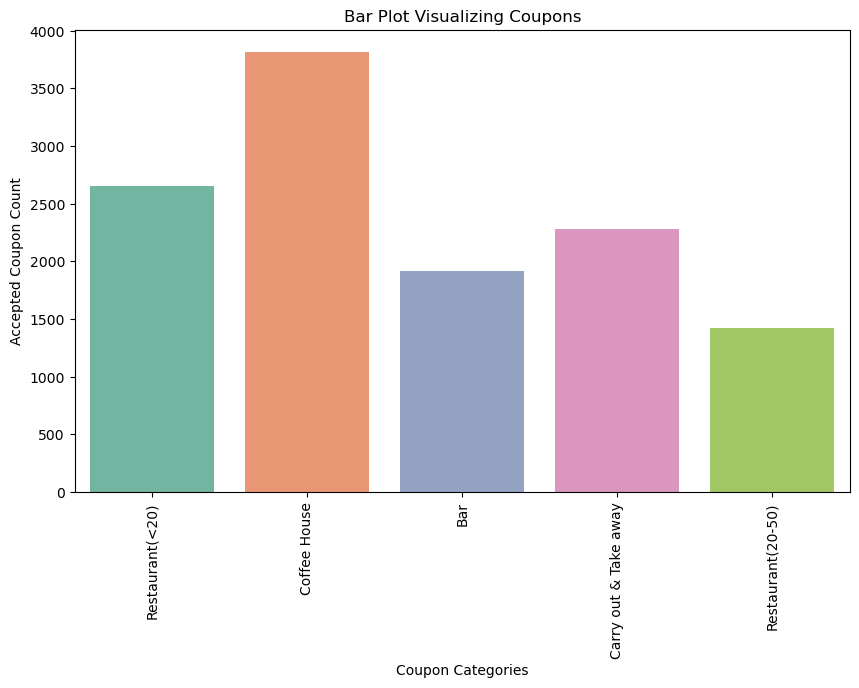

In [572]:
plt.figure(figsize=(10, 6))
sns.countplot(x='coupon',hue = 'coupon',data=data, palette='Set2')
plt.xticks(rotation=90)
plt.title("Bar Plot Visualizing Coupons")
plt.xlabel("Coupon Categories")
plt.ylabel("Accepted Coupon Count")
plt.show()

6. Use a histogram to visualize the temperature column.

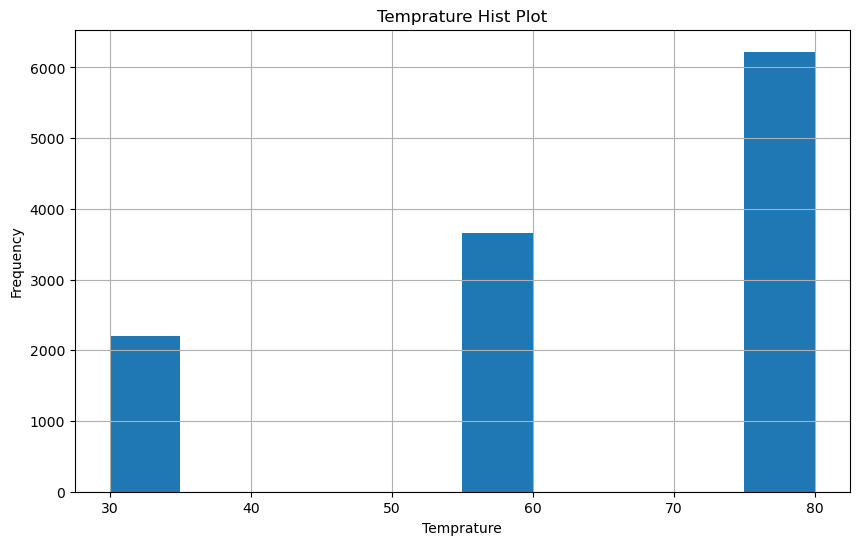

In [573]:
plt.figure(figsize=(10, 6))
data["temperature"].hist();
plt.title("Temprature Hist Plot")
plt.xlabel("Temprature")
plt.ylabel("Frequency");

SNS Version on the histogram for added clarity

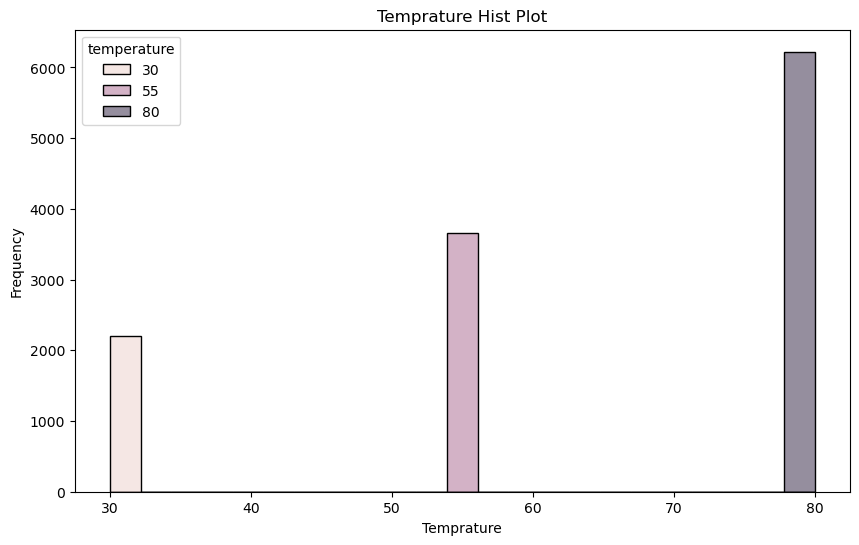

In [574]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data,x='temperature',hue='temperature')
plt.title("Temprature Hist Plot")
plt.xlabel("Temprature")
plt.ylabel("Frequency");

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


**New Data frame Name - df_bar**

In [575]:
df_bar=data.query('coupon == "Bar"')

In [576]:
df_bar

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Cpn_Acptd
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


2. What proportion of bar coupons were accepted?


In [577]:
cpn_acptd_ratio = df_bar["Cpn_Acptd"].mean().round(2)
print(f"The Proportion of bar coupons accepeted for the Bar related coupons is :{cpn_acptd_ratio}")

The Proportion of bar coupons accepeted for the Bar related coupons is :0.41


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


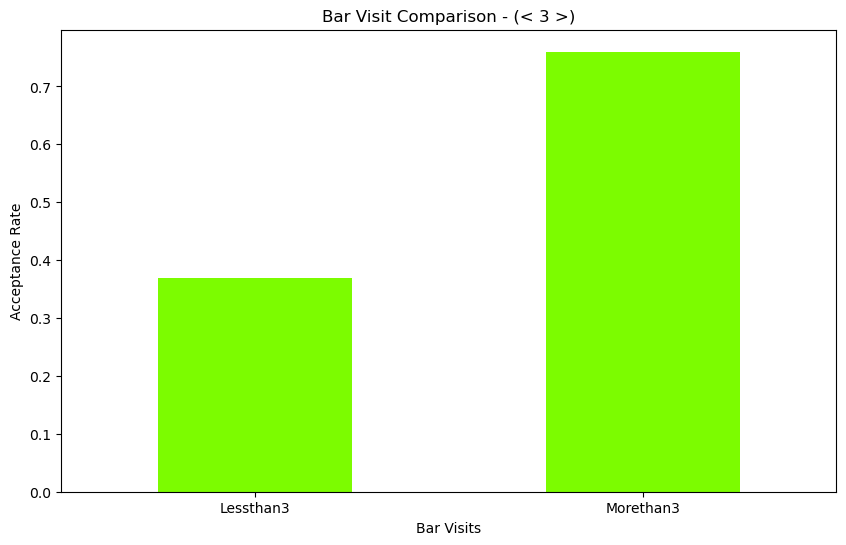

In [578]:
plt.figure(figsize=(10, 6))
df_bar = df_bar.copy() # To remove the "SettingWithCopyWarning" copy issue
df_bar.loc[:,'bar_visit']=np.where((df_bar['Bar'].isin(['never', 'less1', '1~3'])), 'Lessthan3','Morethan3')
df_bar.groupby("bar_visit")["Cpn_Acptd"].mean().round(2).plot(kind='bar',color='lawngreen',xlabel='Bar Visits',
               ylabel='Acceptance Rate',title='Bar Visit Comparison - (< 3 >)');

plt.xticks(rotation=0);

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


                sum  count  mean
driv_per                        
1orMoreVists    278    403  0.69
Lessthan1Visit  510   1510  0.34


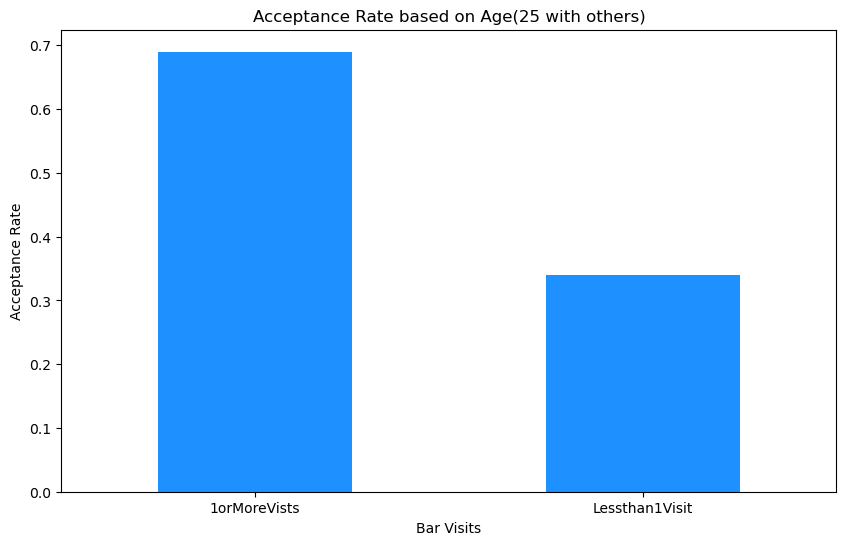

In [579]:
plt.figure(figsize=(10, 6))
df_bar = df_bar.copy() # To remove the "SettingWithCopyWarning" copy issue
df_bar.loc[:,'driv_per']=np.where((df_bar['Bar'].isin(['1~3','4~8','gt8']) & (~df_bar['age'].isin(['below21','21']))), '1orMoreVists','Lessthan1Visit')
print(df_bar.groupby("driv_per")["Cpn_Acptd"].agg(['sum','count','mean']).round(2))
df_bar.groupby("driv_per")["Cpn_Acptd"].mean().round(2).plot(kind='bar',color='dodgerblue',xlabel= 'Bar Visits',
               ylabel='Acceptance Rate',title='Acceptance Rate based on Age(25 with others)')
plt.xticks(rotation=0);


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


occupation
Education&Training&Library                   0.40
Building & Grounds Cleaning & Maintenance    0.50
Retired                                      0.50
Transportation & Material Moving             0.54
Installation Maintenance & Repair            0.56
Computer & Mathematical                      0.57
Legal                                        0.59
Business & Financial                         0.60
Life Physical Social Science                 0.67
Student                                      0.67
Sales & Related                              0.69
Personal Care & Service                      0.75
Office & Administrative Support              0.77
Arts Design Entertainment Sports & Media     0.77
Healthcare Practitioners & Technical         0.79
Food Preparation & Serving Related           0.79
Production Occupations                       0.80
Unemployed                                   0.80
Management                                   0.81
Community & Social Services            

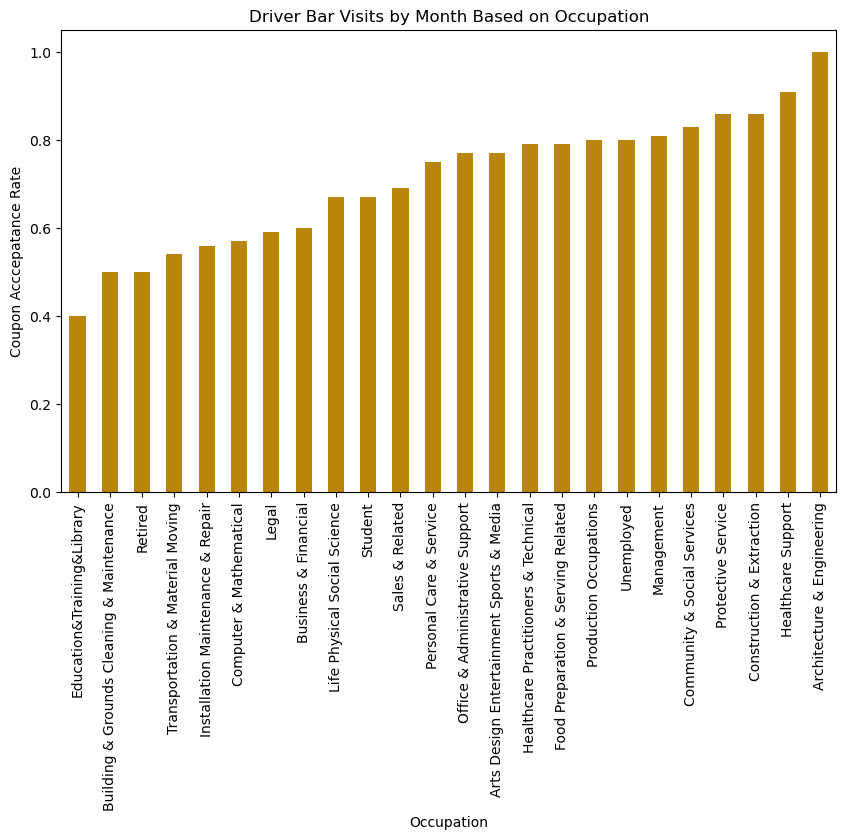

In [580]:
acpt_rt_occup =df_bar.query("passanger != 'Kid(s)' and Bar not in ('never', 'less1') and occupation != ('Farming Fishing & Forestry')").groupby("occupation")["Cpn_Acptd"].mean().round(2).sort_values()
print(acpt_rt_occup);
plt.figure(figsize=(10, 6))
acpt_rt_occup.plot(kind="bar",color='darkgoldenrod')
plt.title("Driver Bar Visits by Month Based on Occupation")
plt.xlabel("Occupation")
plt.ylabel("Coupon Acccepatance Rate");

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



   Bar  passanger  count  sum  mean
0  1~3      Alone    215  140  0.65
1  1~3  Friend(s)     75   62  0.83
2  1~3    Partner     55   32  0.58
3  4~8      Alone    100   82  0.82
4  4~8  Friend(s)     25   18  0.72
5  4~8    Partner     15   10  0.67
6  gt8      Alone     26   19  0.73
7  gt8  Friend(s)     16   11  0.69
8  gt8    Partner      3    2  0.67


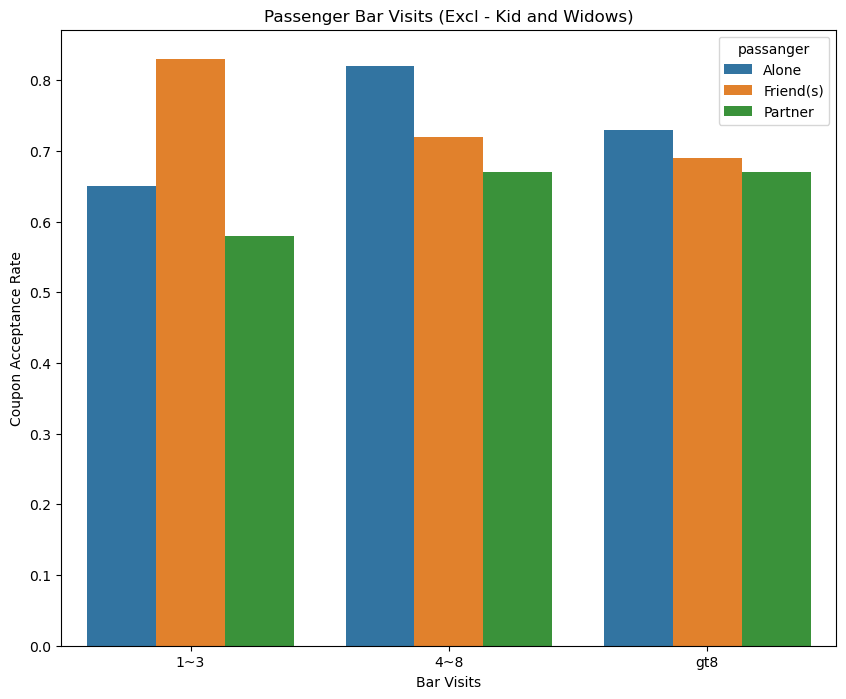

In [581]:
df_pass_grp = df_bar.query("Bar not in ('never','less1') and passanger!='Kid(s)' and maritalStatus != 'widowed'").groupby(['Bar','passanger'],as_index=False)['Cpn_Acptd'].agg(['count','sum','mean']).sort_values(by='Bar').round(2)
print(df_pass_grp)
plt.figure(figsize=(10, 8))
sns.barplot(df_pass_grp,x='Bar',y='mean',hue='passanger')
plt.title("Passenger Bar Visits (Excl - Kid and Widows)")
plt.xlabel("Bar Visits")
plt.ylabel("Coupon Acceptance Rate");

** go to bars more than once a month and are under the age of 30 **

In [582]:
# To remove the "SettingWithCopyWarning" copy issue
df_bar = df_bar.copy() ;

# Modify the "age" to groups to get the required categorical values  viz "'21 - 30', '31 - 40', '41 - 50'".
#e.g - all the data that are in ages 21 to 26 will be grouped as "21 - 30" and so on.
plt.figure(figsize=(10, 6));
df_bar.loc[:,'age']= np.where(df_bar['age'].isin(['21','26']),'21 - 30',np.where(df_bar['age'].isin(['31','36']),'31 - 40',np.where(df_bar['age'].isin(['41','46']),'41 - 50',df_bar['age'])))
age_bar_group=df_bar.query("Bar not in ('never','less1') and age not in ('below21','21 - 30') ").groupby(['Bar','age'],as_index=False)['Cpn_Acptd'].agg('mean').sort_values(by='Bar').round(2)
fig = px.bar(age_bar_group,x='Bar',y='Cpn_Acptd',color='age',  labels={'Bar': 'Bar Visits', 'Cpn_Acptd': 'Coupon Acceptance Rate'},
             title='Customer Bar Visit Chart (Age < 30)');
fig.update_layout(title_x=0.5, title_xanchor='center');
fig.show();

<Figure size 1000x600 with 0 Axes>

** go to cheap restaurants more than 4 times a month and income is less than 50K. **

  RestaurantLessThan20            income  count  sum  mean
0                  4~8   $12500 - $24999    425  230  0.54
1                  4~8   $25000 - $37499    418  239  0.57
2                  4~8   $37500 - $49999    350  215  0.61
3                  4~8  Less than $12500    350  205  0.59
4                  gt8   $12500 - $24999    166  100  0.60
5                  gt8   $25000 - $37499    132   87  0.66
6                  gt8   $37500 - $49999    264  175  0.66
7                  gt8  Less than $12500    109   83  0.76


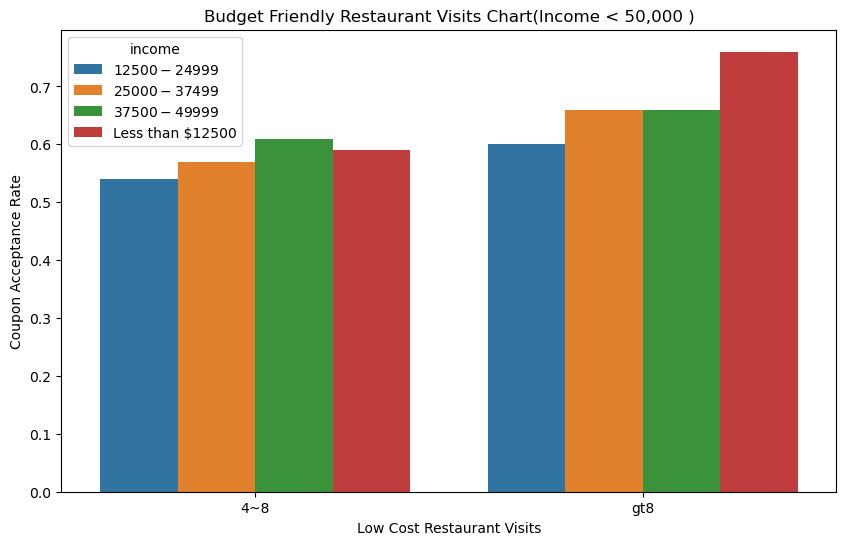

In [583]:
inc_list_50 = [ '$12500 - $24999','$37500 - $49999', '$25000 - $37499', 'Less than $12500']
plt.figure(figsize=(10, 6));
df_inc_grp=data.query("RestaurantLessThan20 in ('4~8','gt8') and income in @inc_list_50").groupby(['RestaurantLessThan20','income'],as_index=False)['Cpn_Acptd'].agg(['count','sum','mean']).sort_values(by='RestaurantLessThan20').round(2)
print(df_inc_grp)
sns.barplot(df_inc_grp,x='RestaurantLessThan20',y='mean',hue='income')
plt.title("Budget Friendly Restaurant Visits Chart(Income < 50,000 )")
plt.xlabel("Low Cost Restaurant Visits")
plt.ylabel("Coupon Acceptance Rate");

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the above plotted data we can determine that the coupon acceptance rate has a direct effect with the number of visits to the bar. 
As the number of visits to the bar increase the chance of coupon acceptance rate also increases.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [584]:
df_ch=data.query('coupon == "Coffee House"')

In [585]:
df_ch

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Cpn_Acptd
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12656,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,0
12659,Work,Alone,Snowy,30,7AM,Coffee House,1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12674,Home,Alone,Rainy,55,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,0
12675,Home,Alone,Snowy,30,10PM,Coffee House,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


passanger
Alone        0.43
Kid(s)       0.47
Partner      0.57
Friend(s)    0.60
Name: Cpn_Acptd, dtype: float64


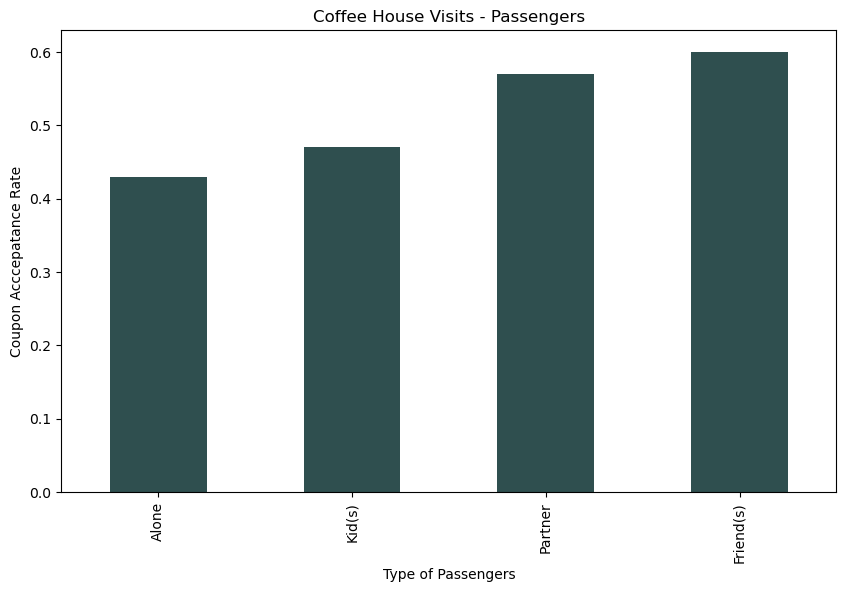

In [586]:
acpt_rt_pass =df_ch.groupby("passanger")["Cpn_Acptd"].mean().round(2).sort_values()
print(acpt_rt_pass)
plt.figure(figsize=(10, 6))
acpt_rt_pass.plot(kind="bar",color='darkslategray')
plt.title("Coffee House Visits - Passengers")
plt.xlabel("Type of Passengers")
plt.ylabel("Coupon Acccepatance Rate");